# House price prediction using regression models
following is the link for dataset: https://www.kaggle.com/datasets/bjaton/housepricesadvancedregressiontechniquestrain

### importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge , RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.cross_decomposition import PLSRegression
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [3]:
df = pd.read_csv('train.csv')
print(df.shape)
print(df.columns)
print(df.info())  

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [4]:
print(df.info())  
df.replace('', pd.NA, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Calculate the percentage of null values for each column
null_percentages = (df.isnull().sum() / len(df)) * 100
# Sort and display top N columns with highest null percentages
top_n = 25  # Adjust this number as needed
# Display null percentages
print("Percentage of null values in each column:")
print(null_percentages.sort_values(ascending=False).head(top_n))

Percentage of null values in each column:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
dtype: float64


#### Dropping columns(4 columns) with very high percentage of missing data

In [6]:
# Define a threshold for dropping columns (e.g., 80%)
threshold = 79
columns_to_drop = null_percentages[null_percentages > threshold].index
data = df.drop(columns=columns_to_drop)
print(data.shape)
print(data.info())

(1460, 77)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 1

#### imputing missing values in the remaining dataframe

In [7]:
target_column = 'SalePrice'
y = data[target_column]

# Drop the target column from the features for imputation
features = data.drop(columns=[target_column])

# Separate numeric and categorical columns
numeric_cols = features.select_dtypes(include=['number']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

# Create separate imputers for numeric and categorical data
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Create copies of the DataFrame for numeric and categorical columns
features_num = features[numeric_cols].copy()
features_cat = features[categorical_cols].copy()

# Impute missing values for numeric columns
features_num_imputed = pd.DataFrame(numeric_imputer.fit_transform(features_num), columns=numeric_cols)
# Impute missing values for categorical columns
features_cat_imputed = pd.DataFrame(categorical_imputer.fit_transform(features_cat), columns=categorical_cols)

# Combine the imputed DataFrames
imputed_features = pd.concat([features_num_imputed, features_cat_imputed], axis=1)

# Reattach the target column to the imputed features
# Ensure target column is not inadvertently modified or dropped
DATA = pd.concat([imputed_features, y.reset_index(drop=True)], axis=1)

# Check the DataFrame after imputation
print("DataFrame after imputation:")
print(DATA.info())
print(DATA.head())


DataFrame after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-

In [8]:
# Dropping id column because it has no effect on target columns or corelation with other columns
Data = DATA.drop('Id', axis=1)
categorical_columns = Data.select_dtypes(include=['object']).columns
# Create an instance of LabelEncoder
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    Data[col] = le.fit_transform(Data[col].astype(str))
    label_encoders[col] = le
# Check the DataFrame after encoding
print("DataFrame after label encoding:")
print(Data.info())
print(Data.head())

DataFrame after label encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   OverallQual    1460 non-null   float64
 4   OverallCond    1460 non-null   float64
 5   YearBuilt      1460 non-null   float64
 6   YearRemodAdd   1460 non-null   float64
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   float64
 9   BsmtFinSF2     1460 non-null   float64
 10  BsmtUnfSF      1460 non-null   float64
 11  TotalBsmtSF    1460 non-null   float64
 12  1stFlrSF       1460 non-null   float64
 13  2ndFlrSF       1460 non-null   float64
 14  LowQualFinSF   1460 non-null   float64
 15  GrLivArea      1460 non-null   float64
 16  BsmtFullBath   1460 non-null   float64
 17  BsmtHalfBath   1460 

In [9]:
# Extract the target variable
y = Data['SalePrice']
# Drop the column with the target variable and any irrelevant columns
x = Data.drop(['SalePrice'], axis=1)

# Convert all features to float64 (if necessary)
x = x.astype('float')
y = y.astype('float')

In [10]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
 


# Linear Regression

In [11]:
# Instantiate the model
model = LinearRegression()
# Train the model
model.fit(x_train, y_train)

LinearRegression()

In [12]:
#make predictions
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rs = r2_score(y_test, y_pred)
print(f'mean square error:{mse}')
print(f"R2 score:{rs}")

mean square error:1094558726.08183
R2 score:0.8431435914190849


C:\Users\OGDCL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


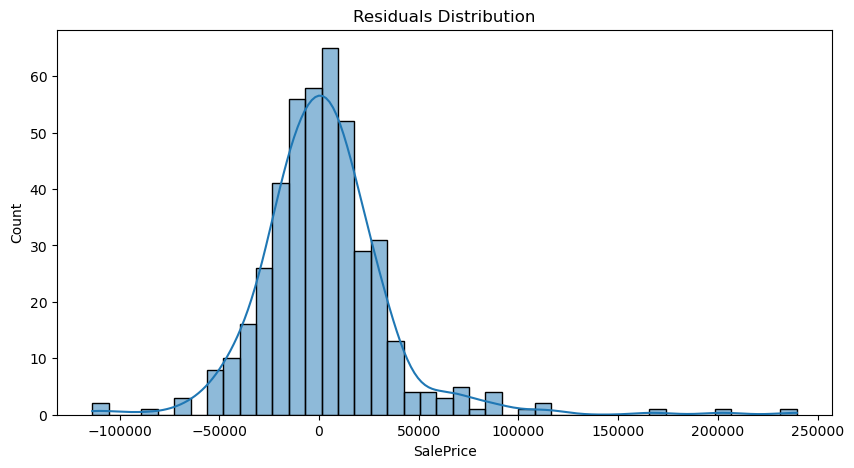

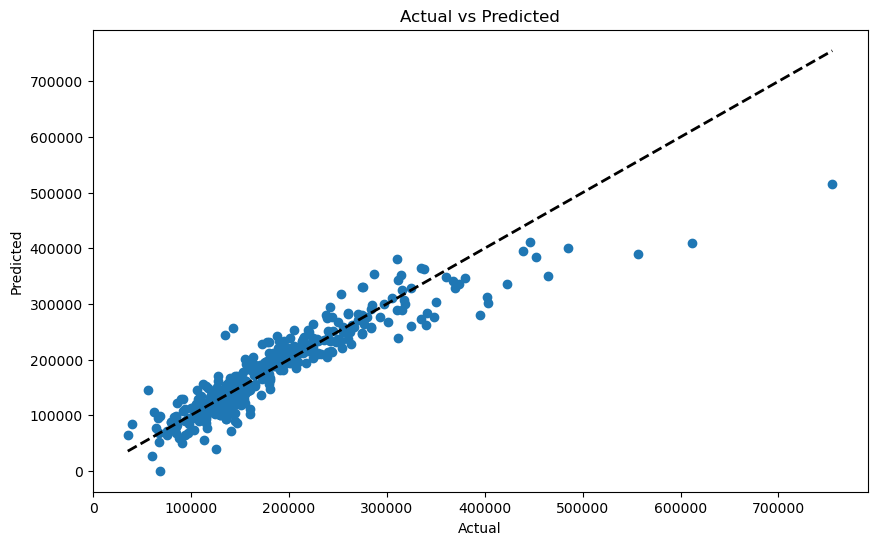

In [13]:
#plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()
#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [14]:
#cross validation
cv_scores = cross_val_score(model, x, y, cv= 5, scoring = 'r2')
print(f'Cross-validated R-squared scores: {cv_scores}')
print(f'Mean cross-validated R-squared score: {cv_scores.mean()}')

Cross-validated R-squared scores: [0.87577341 0.81374066 0.85085687 0.84302468 0.66411072]
Mean cross-validated R-squared score: 0.8095012682818681


In [15]:
#model summary
x_sm = sm.add_constant(x)
model_sm = sm.OLS(y, x_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     106.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        05:09:50   Log-Likelihood:                -17163.
No. Observations:                1460   AIC:                         3.447e+04
Df Residuals:                    1386   BIC:                         3.487e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.723e+06   1.32e+06      1.303

In [16]:
# Log Transformation
model_log = smf.ols('np.log(y) ~ x', data=Data).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:              np.log(y)   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     149.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        05:09:51   Log-Likelihood:                 860.01
No. Observations:                1460   AIC:                            -1572.
Df Residuals:                    1386   BIC:                            -1181.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.6844      5.756      3.594      0.0

Durbin-Watson Test: 1.9579655746744182


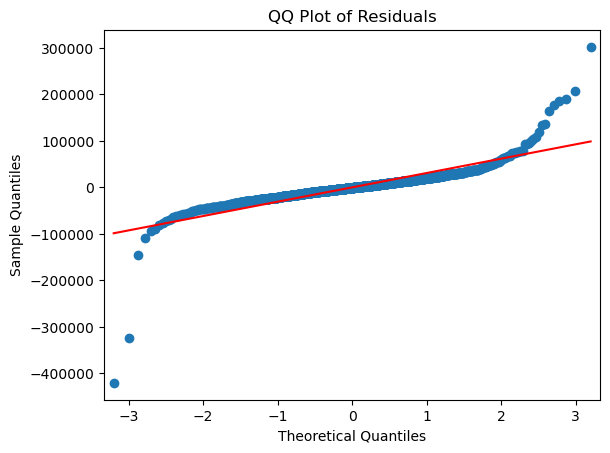

In [17]:
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
# Independence check
dw_test = durbin_watson(model_sm.resid)
print('Durbin-Watson Test:', dw_test)
# Normality check
qqplot(model_sm.resid, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

### removing outliers to check linear regression performance 

In [43]:
# Outlier Removal
influence = OLSInfluence(model_sm)
outliers = influence.resid_studentized_external > 2
data_filtered = Data[~outliers]

C:\Users\OGDCL\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [19]:
Y = data_filtered['SalePrice']
X = data_filtered.drop(['SalePrice'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

C:\Users\OGDCL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


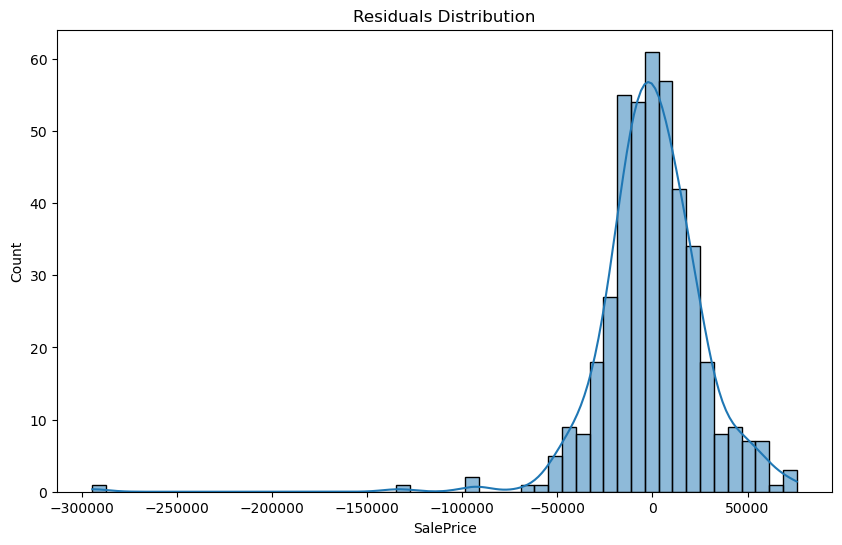

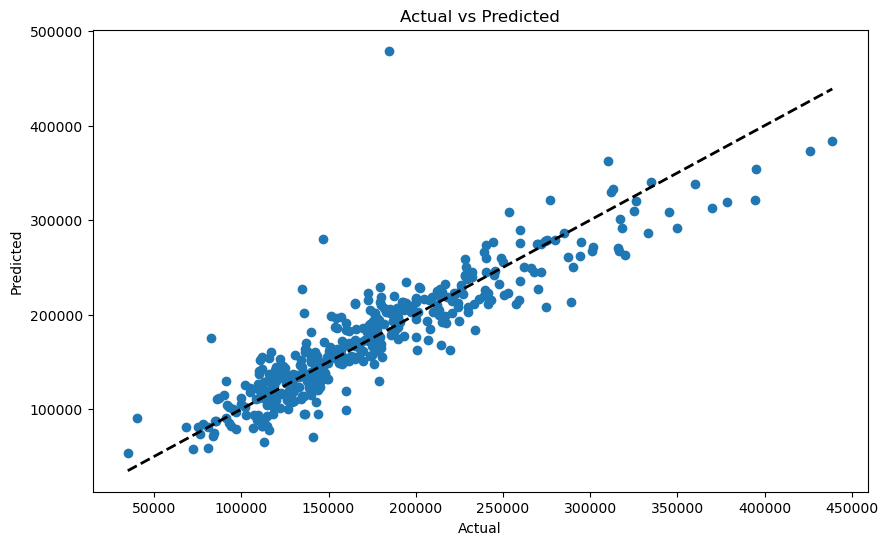

In [20]:
# Initiate the model
model = LinearRegression()
# Train the model
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
# Plotting residuals
residuals = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show() 

In [21]:
X_sm_filtered = sm.add_constant(X)
model_sm_filtered = sm.OLS(Y, X_sm_filtered).fit()
print(model_sm_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     127.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        05:10:25   Log-Likelihood:                -16443.
No. Observations:                1429   AIC:                         3.303e+04
Df Residuals:                    1355   BIC:                         3.342e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.183e+06   1.04e+06      1.138

## Ridge Regression

In [22]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
ridge1 = Ridge(alpha=0)
ridge1.fit(x_train_scaled,y_train)

C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.49194e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0)

In [23]:
pred1 = ridge1.predict(x_test_scaled)
rs1 = r2_score(y_test,pred1)
print(f'R2_score:{rs1}')

R2_score:0.8431435914190812


In [24]:
ridge2= Ridge(alpha=10**6)
ridge2.fit(x_train_scaled,y_train)
pred2 = ridge2.predict(x_test_scaled)
rs2 = r2_score(y_test,pred2)
print(f'R2_score:{rs2}')

R2_score:0.014894592324178668


In [25]:
#finding the best alpha
alphas = np.logspace(1,7,50)
## Initialize and fit RidgeCV to find the best alpha
r2_scorer = make_scorer(r2_score)
ridgecv = RidgeCV(alphas=alphas, scoring=r2_scorer)
ridgecv.fit(x_train_scaled, y_train)
# Print the best alpha
best_alpha = ridgecv.alpha_
print(f"Best alpha from RidgeCV: {best_alpha}")

Best alpha from RidgeCV: 686.6488450042998


In [26]:
#make predictions on the basis of best alpha
ridge = Ridge(alpha =686.6488450042998)
ridge.fit(x_train_scaled,y_train)

Ridge(alpha=686.6488450042998)

In [27]:
#make predictions on the basis of best alpha
ridge = Ridge(alpha =686.6488450042998)
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
rs = r2_score(y_test,y_pred)
print(f'r2score:{rs}')

r2score:0.840830534670892


(50, 75)


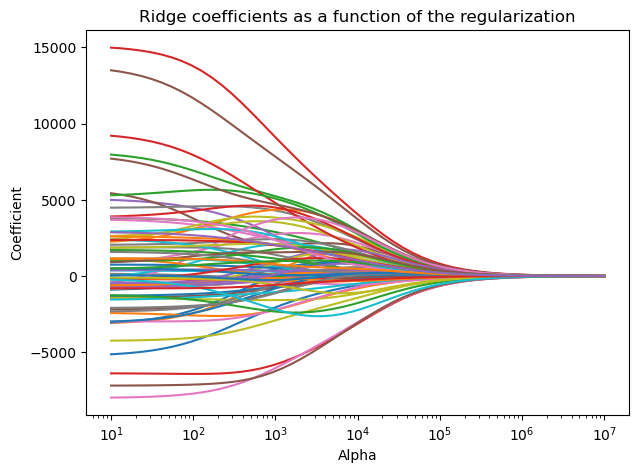

In [28]:
# Perform Ridge regression for different alpha values and store the coefficients
coefs = []
x_scaled = scaler.fit_transform(x)
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(x_scaled, y)
    coefs.append(ridge.coef_)
# Convert the list of coefficients to a numpy array and check its shape
coefs = np.array(coefs)
print(np.shape(coefs))
#plotting
plt.figure(figsize=(7, 5))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=x.columns[i])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

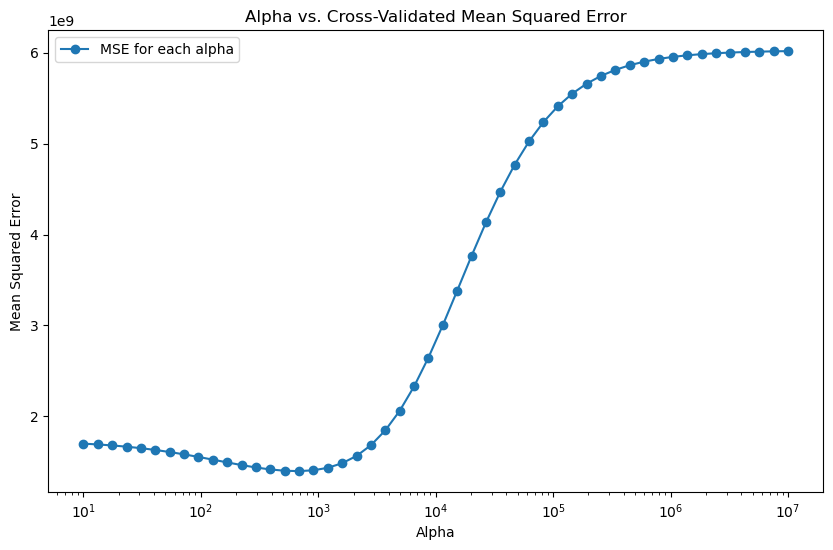

In [29]:
# Calculate the cross-validated MSE for each alpha
mse_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, x_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(-scores.mean())
# Plot the alphas against their respective MSEs
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_scores, marker='o', label='MSE for each alpha')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Alpha vs. Cross-Validated Mean Squared Error')
plt.legend()
plt.show()

In [30]:
#comparing different alphas
#alpha = 0
mse1 = mean_squared_error(y_test,pred1)
print(f"r2 score for best alpha ({0}): {rs1}")
print(f'mse best:{mse1}')
# apha = 10^4
mse2 = mean_squared_error(y_test,pred2)
print(f"r2 score for alpha ({10**6}): {rs2}")
print(f'mse1:{mse2}')
# alpha = 686
mse = mean_squared_error(y_test,y_pred)
print(f"r2 score for alpha ({686}): {rs}")
print(f'mse1:{mse}')

r2 score for best alpha (0): 0.8431435914190812
mse best:1094558726.0818563
r2 score for alpha (1000000): 0.014894592324178668
mse1:6874157899.17022
r2 score for alpha (686): 0.840830534670892
mse1:1110699452.945094


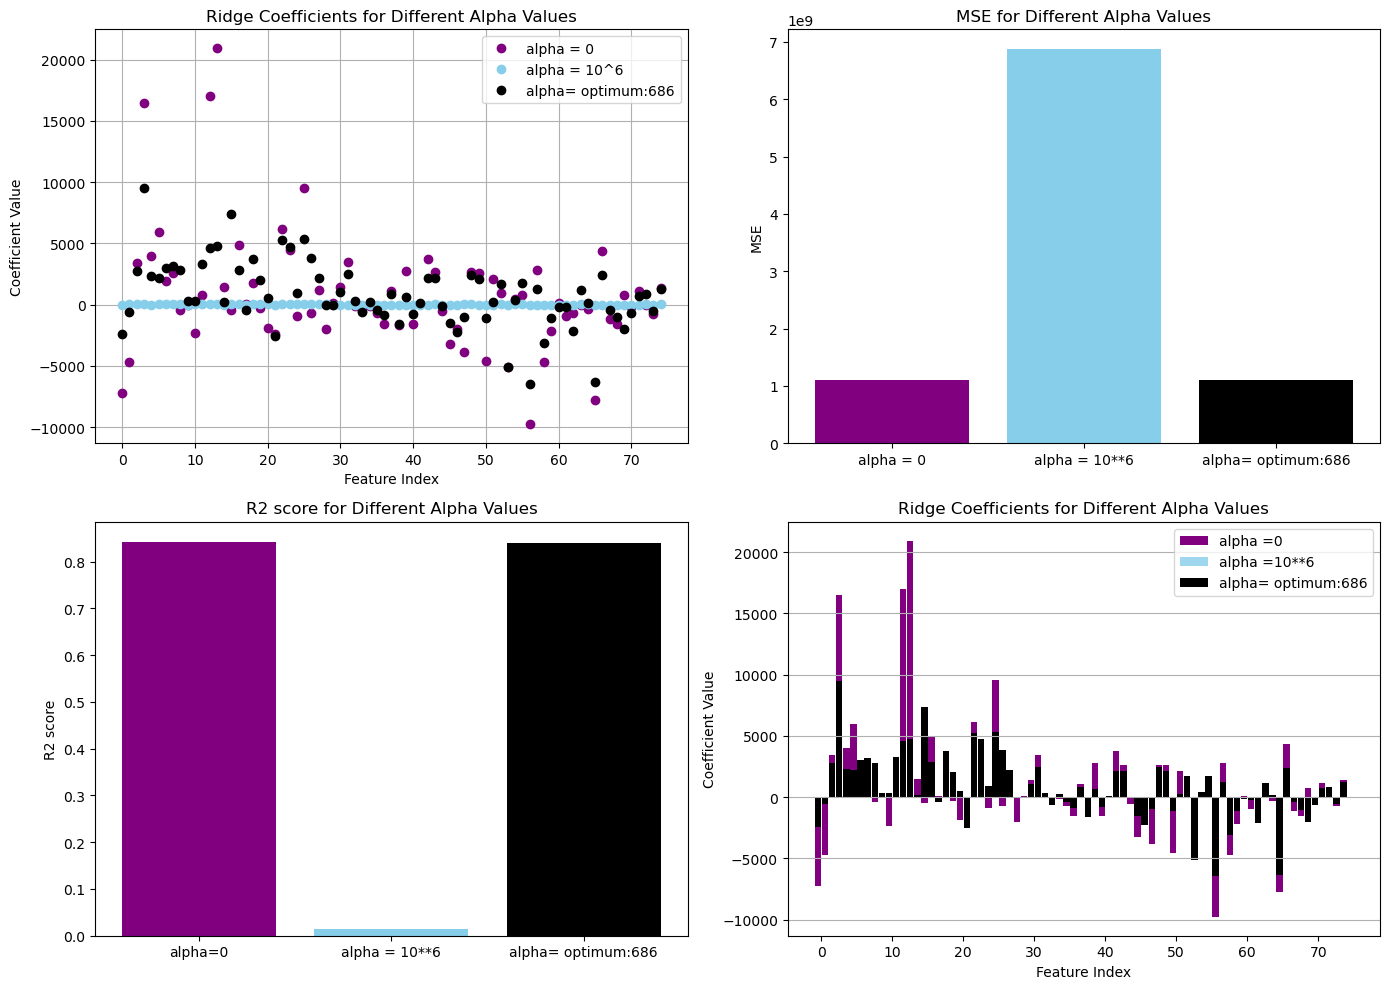

In [31]:
ridge = Ridge(alpha =686.6488450042998)
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
# Plot the coefficients
plt.figure(figsize=(14, 10))
coefs = []
# Plot coefficients in the first subplot
plt.subplot(2, 2, 1)
plt.plot(ridge1.coef_, marker='o',linestyle='none', label='alpha = 0',color='purple')
plt.plot(ridge2.coef_, marker='o',linestyle='none', label='alpha = 10^6',color='skyblue')
plt.plot(ridge.coef_, marker='o',linestyle='none', label='alpha= optimum:686',color='black')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients for Different Alpha Values')
plt.legend()
plt.grid(True) 

# second subplot for MSE 
mse_values = [mse1,  mse2, mse]
alpha_labels = ['alpha = 0','alpha = 10**6', 'alpha= optimum:686']
plt.subplot(2, 2, 2)
plt.bar(alpha_labels, mse_values, color=['purple', 'skyblue','black'])
plt.ylabel('MSE')
plt.title('MSE for Different Alpha Values')

# another subplot for r2 score
rs_values = [rs1,rs2,rs]
alpha_labels = ['alpha=0','alpha = 10**6', 'alpha= optimum:686']
plt.subplot(2, 2, 3)
plt.bar(alpha_labels, rs_values, color=['purple','skyblue','black'])
plt.ylabel('R2 score')
plt.title('R2 score for Different Alpha Values')

# another subplot for plotting ridge coeficients in bars
plt.subplot(2, 2, 4)
feature_indices = np.arange(len(ridge2.coef_))  # Create an array for feature indices
bar_width = 0.9  # Width of the bars
# Create bars for ridge1 (alpha=alpha1)
plt.bar(feature_indices - bar_width / 2, ridge1.coef_, bar_width, label='alpha =0', color='purple', alpha=1)
# Create bars for ridge2 (alpha=alpha2)
plt.bar(feature_indices + bar_width / 2, ridge2.coef_, bar_width, label='alpha =10**6' , color='skyblue', alpha=0.8)
plt.bar(feature_indices - bar_width / 2, ridge.coef_, bar_width, label='alpha= optimum:686', color='black', alpha=1)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients for Different Alpha Values')
plt.legend()
plt.grid(True, axis='y')  

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## LASSO Regresion

In [32]:
# Fit lasso regression models with the best alpha, alpha = 0,  and alpha = 10^10
lasso1 = Lasso(alpha=0)
lasso1.fit(x_train_scaled, y_train)
pred1 = lasso1.predict(x_test_scaled)
mse1 = mean_squared_error(y_test,pred1)
rs1 = r2_score(y_test, pred1)
print(f'Mean sqare error for alpha {0}:{rs1}')
print(f"r2 score for alpha ({0}): {mse1}")


lasso2 = Lasso(alpha=10**4)
lasso2.fit(x_train_scaled, y_train)
pred2 = lasso2.predict(x_test_scaled)
mse2 = mean_squared_error(y_test,pred2)
rs2 = r2_score(y_test, pred2)
print(f'Mean sqare error for alpha {10**4}:{rs2}')
print(f"r2 score for alpha ({10**4}): {mse2}")

# Initialize and fit LassoCV to find the best alpha
lassocv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lassocv.fit(x_train_scaled, y_train)
best_alpha = lassocv.alpha_
print(f"Best alpha from LassoCV: {best_alpha}")
# Fit Lasso regression with the best alpha from LassoCV
lasso_best = Lasso(alpha=best_alpha, max_iter=10000)
lasso_best.fit(x_train_scaled, y_train)
pred_best = lasso_best.predict(x_test_scaled)
mse_best = mean_squared_error(y_test,pred_best)
rs  = r2_score(y_test, pred_best)
print(f'Mean sqare error forbest alpha:{mse_best}')
print(f"r2 score with best alpha: {rs}")

C:\Users\OGDCL\AppData\Local\Temp\ipykernel_7840\3644179586.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso1.fit(x_train_scaled, y_train)
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.845e+11, tolerance: 6.151e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Mean sqare error for alpha 0:0.8431435914190815
r2 score for alpha (0): 1094558726.0818543
Mean sqare error for alpha 10000:0.7751867311591116
r2 score for alpha (10000): 1568768068.6749744
Best alpha from LassoCV: 2811.7686979742307
Mean sqare error forbest alpha:1154189077.3262274
r2 score with best alpha: 0.8345982274146364


(50, 75)


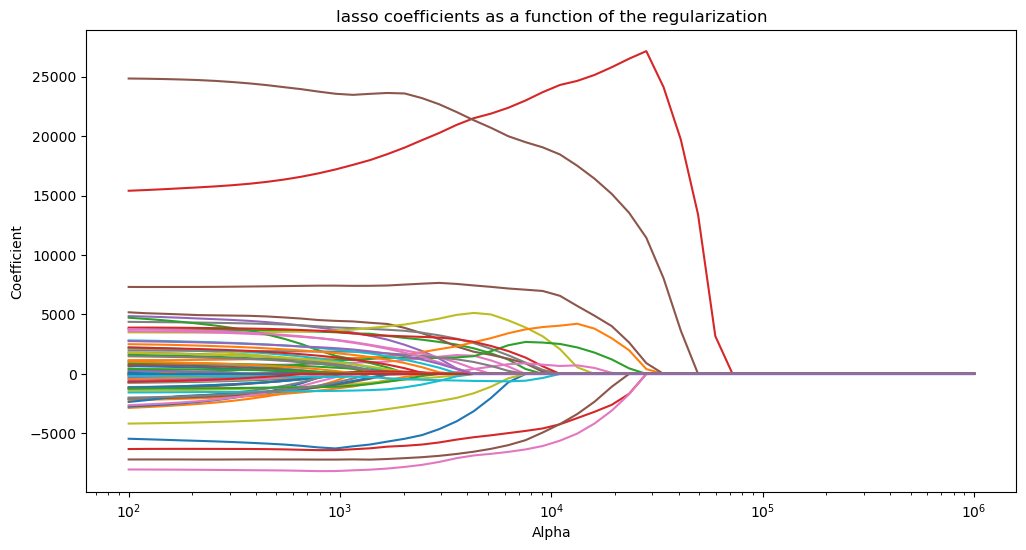

In [33]:
# Perform lasso regression for different alpha values and store the coefficients
lasso = Lasso()
coefs = []
alphas_lasso = np.logspace(2,6,50)
for a in alphas_lasso:
    lasso.set_params(alpha=a)
    lasso.fit(x_scaled, y)
    coefs.append(lasso.coef_)

coefs = np.array(coefs)
print(np.shape(coefs))

plt.figure(figsize=(12,6))
for i in range(coefs.shape[1]):
    plt.plot(alphas_lasso, coefs[:, i], label=x.columns[i])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('lasso coefficients as a function of the regularization')
plt.show()

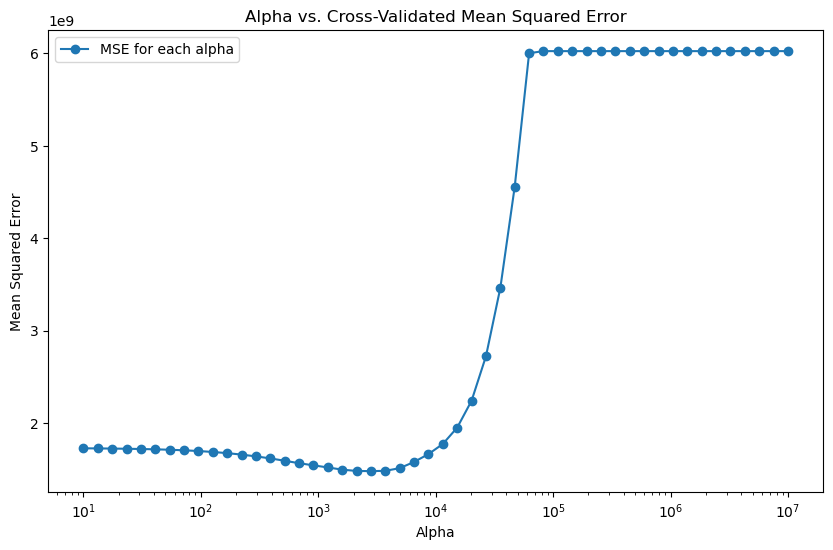

In [44]:
# Calculate the cross-validated MSE for each alpha
mse_scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    scores = cross_val_score(lasso, x_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(-scores.mean())

# Plot the alphas against their respective MSEs
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_scores, marker='o', label='MSE for each alpha')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Alpha vs. Cross-Validated Mean Squared Error')
plt.legend()
plt.show()

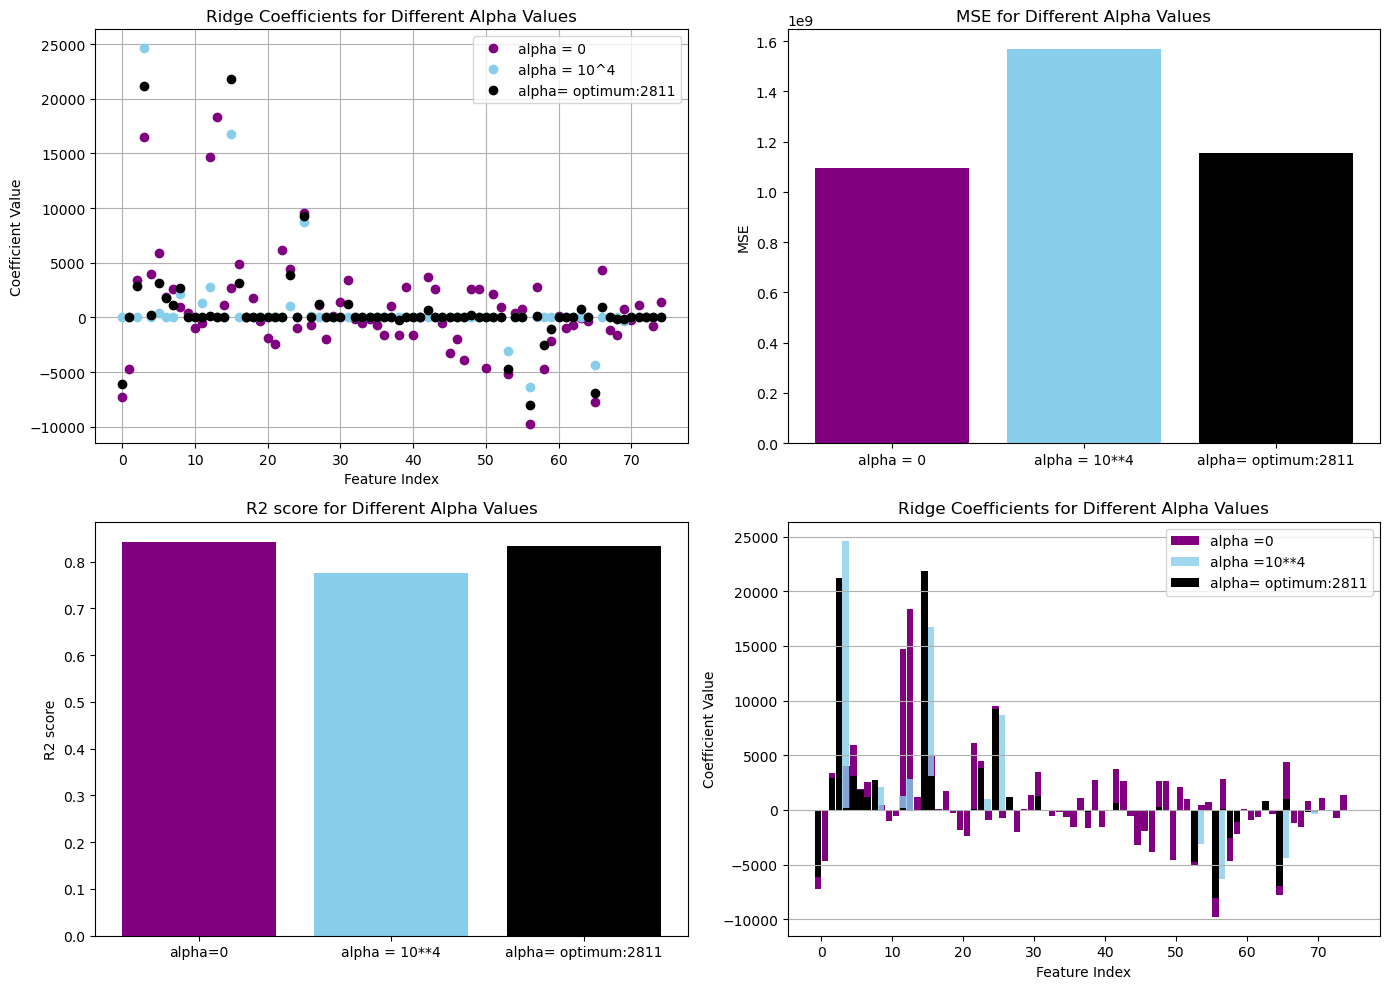

In [35]:
# Plot the coefficients
plt.figure(figsize=(14, 10))
coefs = []
# Plot coefficients in the first subplot
plt.subplot(2, 2, 1)
plt.plot(lasso1.coef_, marker='o',linestyle='none', label='alpha = 0',color='purple')
plt.plot(lasso2.coef_, marker='o',linestyle='none', label='alpha = 10^4',color='skyblue')
plt.plot(lasso_best.coef_, marker='o',linestyle='none', label='alpha= optimum:2811',color='black')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients for Different Alpha Values')
plt.legend()
plt.grid(True) 

# second subplot for MSE 
mse_values = [mse1,  mse2, mse_best]
alpha_labels = ['alpha = 0','alpha = 10**4', 'alpha= optimum:2811']
plt.subplot(2, 2, 2)
plt.bar(alpha_labels, mse_values, color=['purple', 'skyblue','black'])
plt.ylabel('MSE')
plt.title('MSE for Different Alpha Values')

# another subplot for r2 score
rs_values = [rs1,rs2,rs]
alpha_labels = ['alpha=0','alpha = 10**4', 'alpha= optimum:2811']
plt.subplot(2, 2, 3)
plt.bar(alpha_labels, rs_values, color=['purple','skyblue','black'])
plt.ylabel('R2 score')
plt.title('R2 score for Different Alpha Values')

# another subplot for plotting ridge coeficients in bars
plt.subplot(2, 2, 4)
feature_indices = np.arange(len(ridge2.coef_))  # Create an array for feature indices
bar_width = 0.9  # Width of the bars
# Create bars for ridge1 (alpha=alpha1)
plt.bar(feature_indices - bar_width / 2, lasso1.coef_, bar_width, label='alpha =0', color='purple', alpha=1)
# Create bars for ridge2 (alpha=alpha2)
plt.bar(feature_indices + bar_width / 2, lasso2.coef_, bar_width, label='alpha =10**4' , color='skyblue', alpha=0.8)
plt.bar(feature_indices - bar_width / 2, lasso_best.coef_, bar_width, label='alpha= optimum:2811', color='black', alpha=1)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients for Different Alpha Values')
plt.legend()
plt.grid(True, axis='y')  

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# (PartialLeastSquares) PLS Regression

In [36]:
pls = PLSRegression(n_components= 10)
pls.fit(x_train_scaled,y_train)
y_test_pred = pls.predict(x_test_scaled)
rs_1= r2_score(y_test,y_test_pred)
print(f'R2 Score:{rs_1}')

y_train_cv = cross_val_predict(pls,x_train_scaled,y_train,cv=10)
rs_2 = r2_score(y_train,y_train_cv)
print(f'R2 Score:{rs_2}')

R2 Score:0.8422378741436942
R2 Score:0.7578222505877239


In [37]:
def evaluate_pls_components(x_train_scaled, y_train, x_test_scaled, y_test, n_components_list):
    r2_scores=[]
    mse_scores=[]
    
    for ele in n_components_list:
        pls = PLSRegression(n_components=ele)
        y_train_pred = cross_val_predict(pls,x_train_scaled,y_train,cv= 10)
        r2_cv = r2_score(y_train, y_train_pred)
        mse_cv = mean_squared_error(y_train, y_train_pred)
        pls.fit(x_train, y_train)
        y_test_pred = pls.predict(x_test)
        r2_test = r2_score(y_test, y_test_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        r2_scores.append(r2_test)
        mse_scores.append(mse_test)
    return r2_scores, mse_scores

In [38]:
n_components_list = [1,2,3,4,5,6,7,8,9,10,15]
r2_scores, mse_scores = evaluate_pls_components(x_train_scaled, y_train, x_test_scaled, y_test, n_components_list)

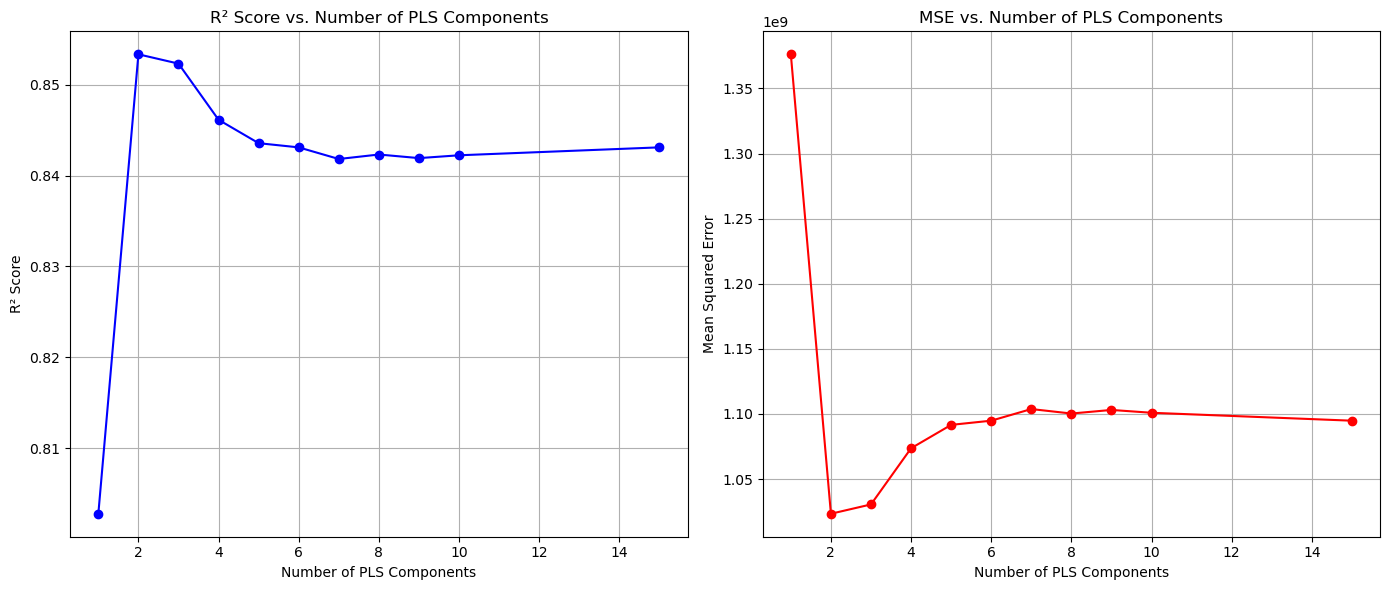

In [39]:
def plot_metrics(n_components_list, r2_scores, mse_scores):
    plt.figure(figsize=(14, 6))
    
    # Plot R² scores
    plt.subplot(1, 2, 1)
    plt.plot(n_components_list, r2_scores, '-o', color='blue')
    plt.xlabel('Number of PLS Components')
    plt.ylabel('R² Score')
    plt.title('R² Score vs. Number of PLS Components')
    plt.grid(True)
    
    # Plot MSE
    plt.subplot(1, 2, 2)
    plt.plot(n_components_list, mse_scores, '-o', color='red')
    plt.xlabel('Number of PLS Components')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE vs. Number of PLS Components')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_metrics(n_components_list, r2_scores, mse_scores)


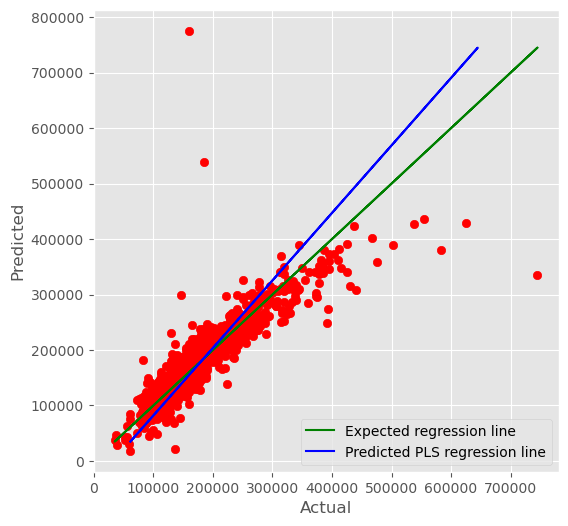

In [40]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y_train, y_train_cv, color='red')
    plt.plot(y_train, y_train, '-g', label='Expected regression line')
    z = np.polyfit(y_train, y_train_cv, 1)
    plt.plot(np.polyval(z, y_train), y_train, color='blue', label='Predicted PLS regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()


In [41]:
# Run PLS with the suggested number of components
pls = PLSRegression(n_components=2)
pls.fit(x_train_scaled, y_train)
# Make predictions
yh_train = pls.predict(x_train_scaled)
yh_test = pls.predict(x_test_scaled)
# Calculate Mean Squared Error
rs_best_tr = r2_score(y_train, yh_train)
rs_best_ts = r2_score(y_test, yh_test)  # Corrected to use y_test
# Print coefficients and MSE for the best PLS model
# Assuming you use DataFrame and column names are known
column_names = [f'Feature_{i}' for i in range(x_train_scaled.shape[1])]  # Use feature names or create a list
print("\nPLS Regression with best PLS component coefficients:")
print(pd.Series(pls.coef_.flatten(), index=column_names))  # Flatten to match feature count
print(f"Test Mean Squared Error for best PLS Component: {rs_best_ts}")
print(f"Train Mean Squared Error for best PLS Component: {rs_best_tr}")


PLS Regression with best PLS component coefficients:
Feature_0    -1897.035693
Feature_1     1895.519037
Feature_2     3519.874047
Feature_3     8181.421167
Feature_4     2201.567080
                 ...     
Feature_70   -1322.764690
Feature_71      -6.809692
Feature_72     742.187033
Feature_73    -303.619231
Feature_74    1316.822758
Length: 75, dtype: float64
Test Mean Squared Error for best PLS Component: 0.8533518389244868
Train Mean Squared Error for best PLS Component: 0.8090604394551397


C:\Users\OGDCL\anaconda3\Lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


# PC Regression

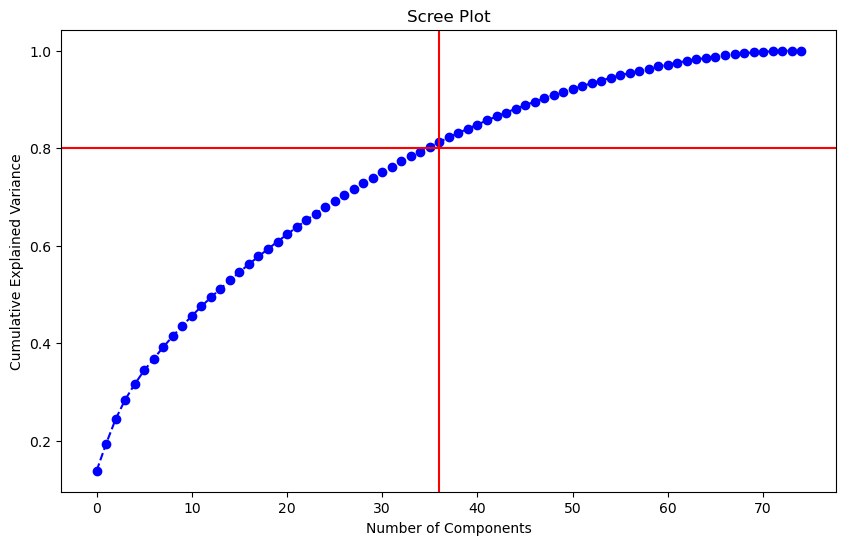

Number of components explaining 80% of the variance: 36
Train MSE: 1138657682.421921, Train R2: 0.8108094368023185
Test MSE: 1078214040.3540993, Test R2: 0.8454858766172607


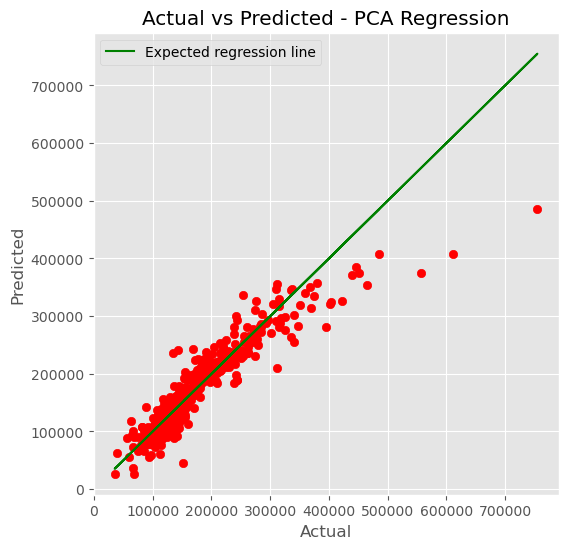

In [42]:
from sklearn.decomposition import PCA
# Apply PCA and fit it on the training data
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)

# Plot the explained variance ratio
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.axvline(x=np.argmax(np.cumsum(explained_variance) >= 0.80) + 1, color='r', linestyle='-')
plt.show()

# Determine the number of components that explain 80% of the variance
n_components_80 = np.argmax(np.cumsum(explained_variance) >= 0.80) + 1
print(f"Number of components explaining 80% of the variance: {n_components_80}")

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components_80)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# In[9]:

# Apply linear regression on PCA-transformed data
lr = LinearRegression()
lr.fit(x_train_pca, y_train)

# Predictions
y_train_pred = lr.predict(x_train_pca)
y_test_pred = lr.predict(x_test_pca)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train MSE: {train_mse}, Train R2: {train_r2}')
print(f'Test MSE: {test_mse}, Test R2: {test_r2}')

# In[10]:

# Plotting actual vs predicted
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y_test, y_test_pred, color='red')
    plt.plot( y_test,y_test, '-g', label='Expected regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted - PCA Regression')
    plt.legend()
    plt.show()